In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [2]:
gold = pd.read_csv(r'C:\Users\Asusu\Documents\FTDS\Phase 2\Final Project\p2-final-project-ftds-002-bsd-group-002\dataset\gold_historical_data.csv')
gold

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-01-02 00:00:00-05:00,1672.800049,1693.800049,1670.000000,1687.900024,35,0.0,0.0
1,2013-01-03 00:00:00-05:00,1686.099976,1686.800049,1662.000000,1673.699951,140,0.0,0.0
2,2013-01-04 00:00:00-05:00,1647.000000,1658.300049,1625.699951,1648.099976,199,0.0,0.0
3,2013-01-07 00:00:00-05:00,1656.500000,1659.900024,1643.800049,1645.500000,49,0.0,0.0
4,2013-01-08 00:00:00-05:00,1647.699951,1661.500000,1647.699951,1661.500000,17,0.0,0.0
...,...,...,...,...,...,...,...,...
2743,2023-11-28 00:00:00-05:00,2040.599976,2042.699951,2039.699951,2039.699951,174665,0.0,0.0
2744,2023-11-29 00:00:00-05:00,2041.699951,2052.100098,2036.000000,2047.099976,15290,0.0,0.0
2745,2023-11-30 00:00:00-05:00,2046.099976,2047.099976,2033.099976,2038.099976,2506,0.0,0.0
2746,2023-12-01 00:00:00-05:00,2038.300049,2073.199951,2036.000000,2071.000000,614,0.0,0.0


In [3]:
df = gold.copy()
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2013-01-02 00:00:00-05:00,1672.800049,1693.800049,1670.000000,1687.900024,35,0.0,0.0
1,2013-01-03 00:00:00-05:00,1686.099976,1686.800049,1662.000000,1673.699951,140,0.0,0.0
2,2013-01-04 00:00:00-05:00,1647.000000,1658.300049,1625.699951,1648.099976,199,0.0,0.0
3,2013-01-07 00:00:00-05:00,1656.500000,1659.900024,1643.800049,1645.500000,49,0.0,0.0
4,2013-01-08 00:00:00-05:00,1647.699951,1661.500000,1647.699951,1661.500000,17,0.0,0.0
...,...,...,...,...,...,...,...,...
2743,2023-11-28 00:00:00-05:00,2040.599976,2042.699951,2039.699951,2039.699951,174665,0.0,0.0
2744,2023-11-29 00:00:00-05:00,2041.699951,2052.100098,2036.000000,2047.099976,15290,0.0,0.0
2745,2023-11-30 00:00:00-05:00,2046.099976,2047.099976,2033.099976,2038.099976,2506,0.0,0.0
2746,2023-12-01 00:00:00-05:00,2038.300049,2073.199951,2036.000000,2071.000000,614,0.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2748 non-null   object 
 1   Open          2748 non-null   float64
 2   High          2748 non-null   float64
 3   Low           2748 non-null   float64
 4   Close         2748 non-null   float64
 5   Volume        2748 non-null   int64  
 6   Dividends     2748 non-null   float64
 7   Stock Splits  2748 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 171.9+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'], utc=True)
df['Date'] = df['Date'].dt.tz_convert(None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2748 entries, 0 to 2747
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          2748 non-null   datetime64[ns]
 1   Open          2748 non-null   float64       
 2   High          2748 non-null   float64       
 3   Low           2748 non-null   float64       
 4   Close         2748 non-null   float64       
 5   Volume        2748 non-null   int64         
 6   Dividends     2748 non-null   float64       
 7   Stock Splits  2748 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 171.9 KB


In [6]:
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day']=df[ "Date"].dt.day

In [7]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day
0,2013-01-02 05:00:00,1672.800049,1693.800049,1670.000000,1687.900024,35,0.0,0.0,2013,1,2
1,2013-01-03 05:00:00,1686.099976,1686.800049,1662.000000,1673.699951,140,0.0,0.0,2013,1,3
2,2013-01-04 05:00:00,1647.000000,1658.300049,1625.699951,1648.099976,199,0.0,0.0,2013,1,4
3,2013-01-07 05:00:00,1656.500000,1659.900024,1643.800049,1645.500000,49,0.0,0.0,2013,1,7
4,2013-01-08 05:00:00,1647.699951,1661.500000,1647.699951,1661.500000,17,0.0,0.0,2013,1,8
...,...,...,...,...,...,...,...,...,...,...,...
2743,2023-11-28 05:00:00,2040.599976,2042.699951,2039.699951,2039.699951,174665,0.0,0.0,2023,11,28
2744,2023-11-29 05:00:00,2041.699951,2052.100098,2036.000000,2047.099976,15290,0.0,0.0,2023,11,29
2745,2023-11-30 05:00:00,2046.099976,2047.099976,2033.099976,2038.099976,2506,0.0,0.0,2023,11,30
2746,2023-12-01 05:00:00,2038.300049,2073.199951,2036.000000,2071.000000,614,0.0,0.0,2023,12,1


In [8]:
train_size = round(len(df)*0.8)

train = df[0:train_size][['Date','Close']]
test = df[train_size:][['Date','Close']]

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2198 entries, 0 to 2197
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2198 non-null   datetime64[ns]
 1   Close   2198 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 34.5 KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 2198 to 2747
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    550 non-null    datetime64[ns]
 1   Close   550 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.7 KB


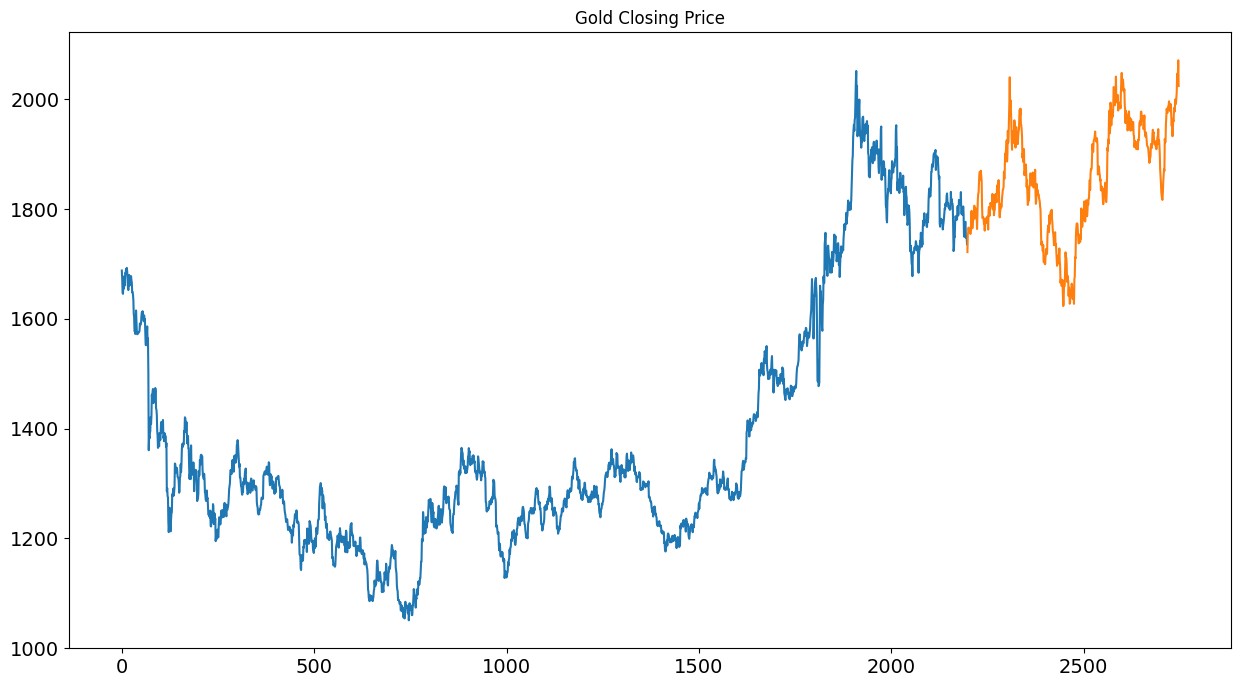

In [10]:
train['Date'] = pd.DatetimeIndex(train['Date']).date
test['Date'] = pd.DatetimeIndex(test['Date']).date

train['Close'].plot(figsize=(15,8), title= 'Gold Closing Price', fontsize=14)
test['Close'].plot(figsize=(15,8), title= 'Gold Closing Price', fontsize=14)

plt.show()

In [11]:
def check_stationarity(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.05) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [12]:
check_stationarity(train['Close'])

ADF Statistic: -1.173229
p-value: 0.685005
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Non-stationary


<Axes: xlabel='Date'>

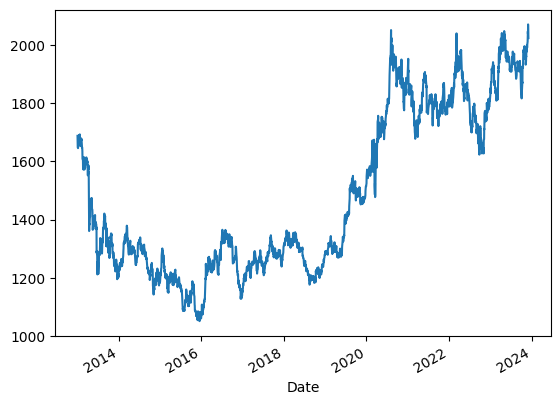

In [13]:
df.set_index('Date', inplace=True)
df['Close'].plot()

In [14]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day
Date,,,,,,,,,,
2013-01-02 05:00:00,1672.800049,1693.800049,1670.000000,1687.900024,35,0.0,0.0,2013,1,2
2013-01-03 05:00:00,1686.099976,1686.800049,1662.000000,1673.699951,140,0.0,0.0,2013,1,3
2013-01-04 05:00:00,1647.000000,1658.300049,1625.699951,1648.099976,199,0.0,0.0,2013,1,4
2013-01-07 05:00:00,1656.500000,1659.900024,1643.800049,1645.500000,49,0.0,0.0,2013,1,7
2013-01-08 05:00:00,1647.699951,1661.500000,1647.699951,1661.500000,17,0.0,0.0,2013,1,8
...,...,...,...,...,...,...,...,...,...,...
2023-11-28 05:00:00,2040.599976,2042.699951,2039.699951,2039.699951,174665,0.0,0.0,2023,11,28
2023-11-29 05:00:00,2041.699951,2052.100098,2036.000000,2047.099976,15290,0.0,0.0,2023,11,29
2023-11-30 05:00:00,2046.099976,2047.099976,2033.099976,2038.099976,2506,0.0,0.0,2023,11,30


# Differencing

1st order differencing
ADF Statistic: -54.157403
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Stationary


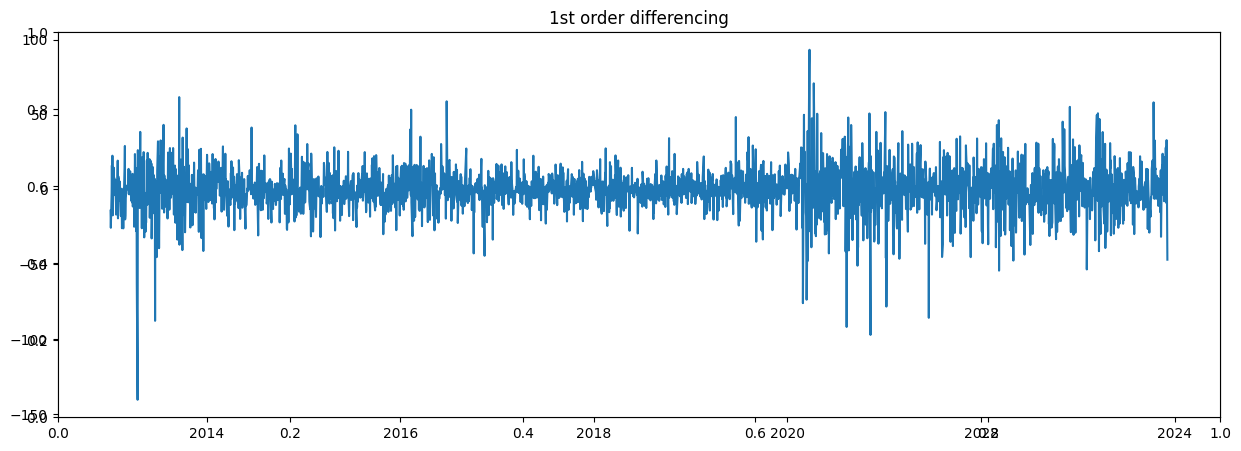

In [15]:
diff1 = df['Close'].diff()
# Plot the result after first-order differencing

fig, ax = plt.subplots(figsize=(15,5))
ax1 = fig.add_subplot(111)
ax1.set_title('1st order differencing')
ax1.plot(diff1)

# Check stationarity after performing first-order differencing

print("1st order differencing")
check_stationarity(diff1.dropna())

setelah melakukan diff hasilnya langsung stationer maka akan dicatat sebagai first differencing atau d=1

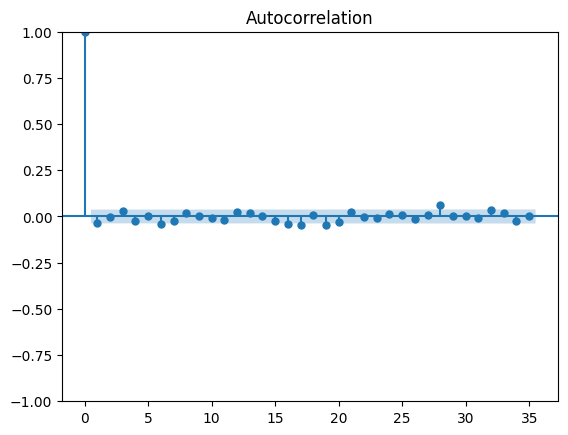

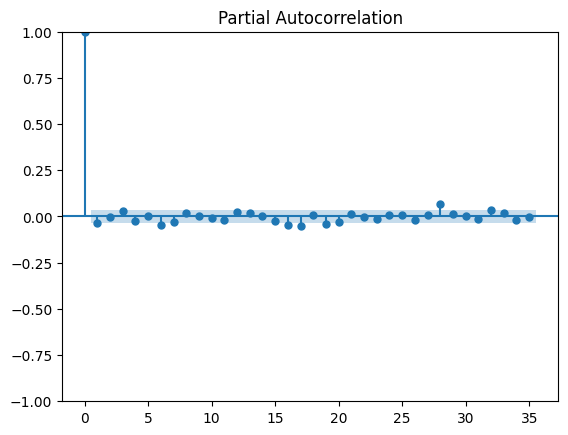

In [16]:
# Plot ACF & PACF from the original dataset

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['Close'].diff().dropna())
plot_pacf(df['Close'].diff().dropna())
plt.show()

pada plot ini menunjukkan bahwa pacf = 28 dan acf=28

# Arima

In [17]:
# make the model
price_predictor = ARIMA(train['Close'], order=(28,1,28))
result_predictor = price_predictor.fit()

In [18]:
y_hat_avg = test.copy()

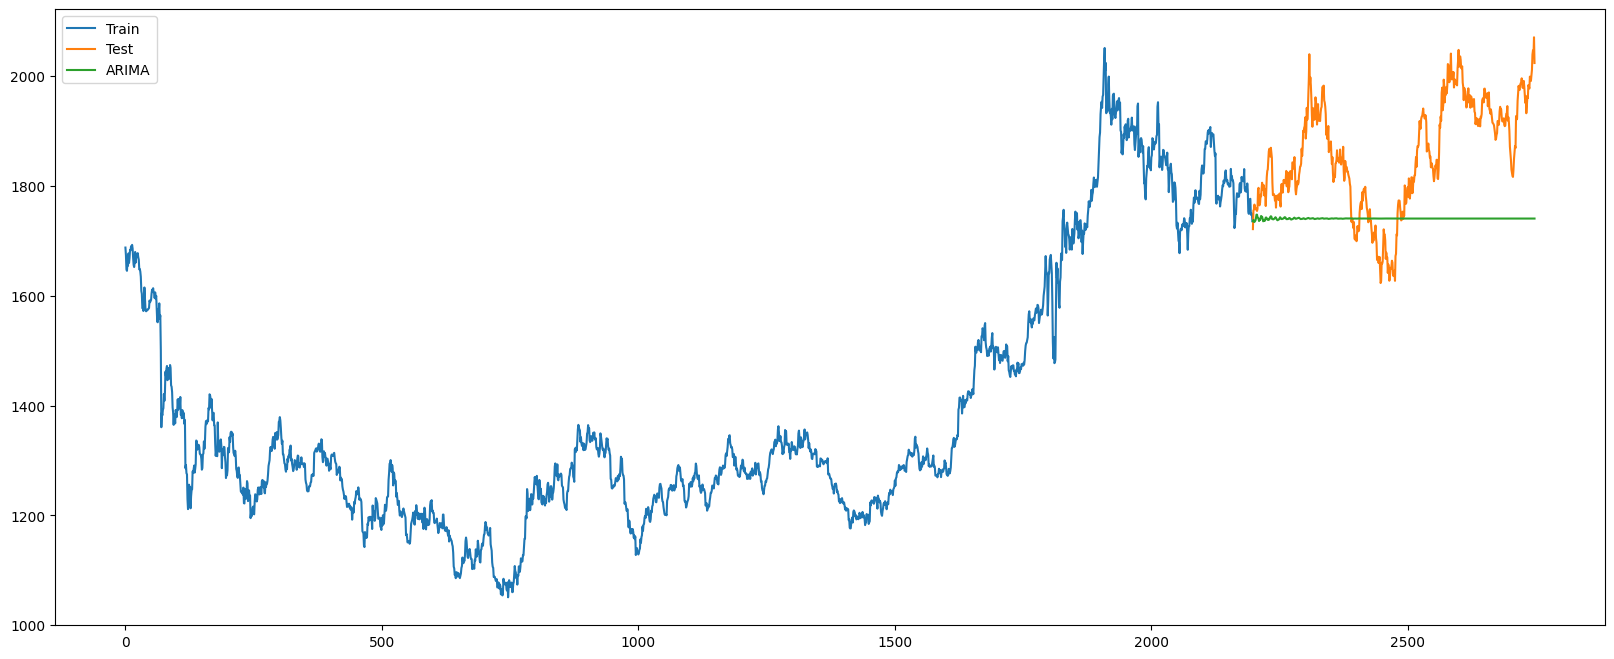

In [19]:
y_hat_avg['ARIMA'] = result_predictor.forecast(len(test))
plt.figure(figsize=(20,8))
plt.plot(train['Close'], label='Train')
plt.plot(test['Close'], label='Test')
plt.plot(y_hat_avg['ARIMA'], label='ARIMA')
plt.legend(loc='best')
plt.show()

In [20]:
test.tail()

,Date,Close
2743,2023-11-28,2039.699951
2744,2023-11-29,2047.099976
2745,2023-11-30,2038.099976
2746,2023-12-01,2071.000000
2747,2023-12-04,2024.099976


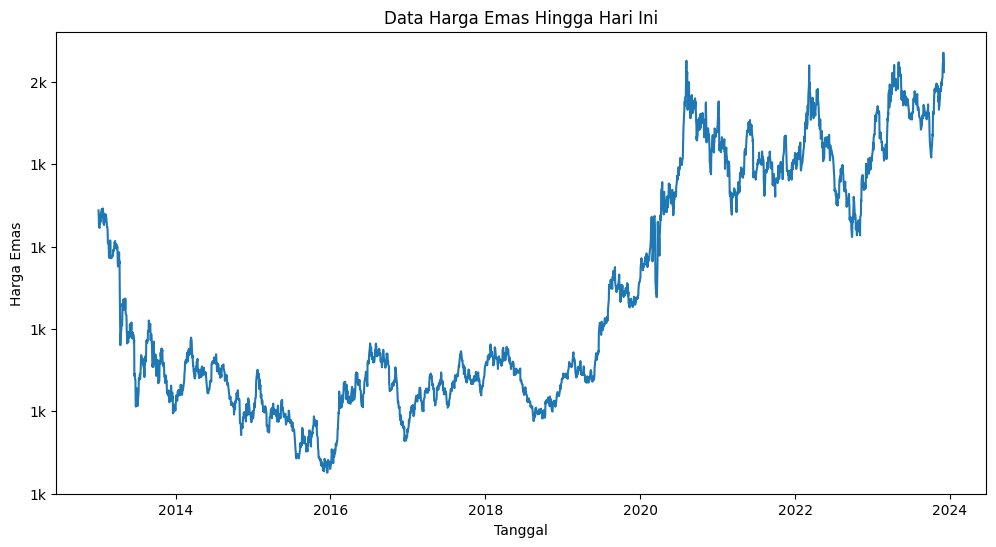

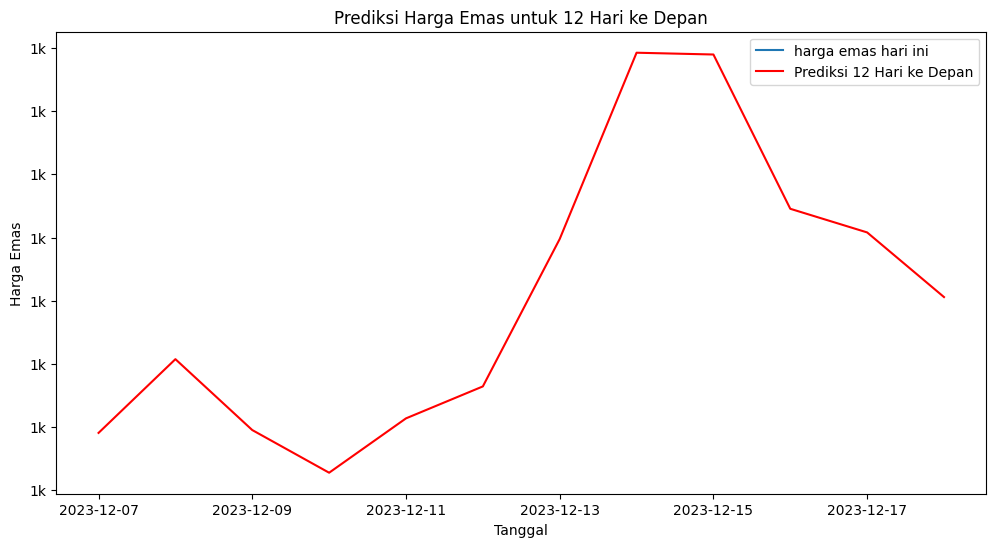

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from statsmodels.tsa.arima.model import ARIMA
import datetime

def price_formatter(x, pos):
    if x >= 1e6:
        return f'{x/1e6:.2f}m'
    elif x >= 1e3:
        return f'{int(x/1e3)}k'
    else:
        return str(int(x))

# Load data
data = pd.read_csv(r'C:\Users\Asusu\Documents\FTDS\Phase 2\Final Project\p2-final-project-ftds-002-bsd-group-002\dataset\gold_historical_data.csv')
timestamps = pd.to_datetime(data['Date'])
Close = data['Close']

# Visualisasi data
plt.figure(figsize=(12, 6))
plt.plot(timestamps, Close)
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(price_formatter))
plt.title('Data Harga Emas Hingga Hari Ini')
plt.xlabel('Tanggal')
plt.ylabel('Harga Emas')
plt.show()

# Tanggal hari ini
today = datetime.date.today()

# Pemisahan data
train_size = int(len(data) * 0.8)
train_data = Close[:train_size]

# Pelatihan model ARIMA
model = ARIMA(train_data, order=(28, 1, 28))
model_fit = model.fit()

# Prediksi 3 bulan ke depan
forecast = model_fit.forecast(steps=12)

# Buat indeks tanggal untuk data prediksi
forecast_index = pd.date_range(start=today, periods=12, freq='D')

# Visualisasi hasil prediksi
plt.figure(figsize=(12, 6))
plt.plot(timestamps[4091-365:], Close[4091-365:], label='harga emas hari ini')
plt.plot(forecast_index, forecast, color='red', label='Prediksi 12 Hari ke Depan')
plt.title('Prediksi Harga Emas untuk 12 Hari ke Depan')
plt.xlabel('Tanggal')
plt.ylabel('Harga Emas')
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(price_formatter))
plt.legend()
plt.show()


In [22]:
import pandas as pd
from datetime import date

# Tanggal hari ini
today = date.today()

# Forecast menggunakan model_fit
forecast_values = model_fit.forecast(steps=12)

# Buat indeks tanggal untuk data prediksi
forecast_index = pd.date_range(start=today, periods=12, freq='D')

# Gabungkan hasil prediksi dan indeks tanggal ke dalam satu DataFrame
forecast_df = pd.DataFrame(forecast_index, forecast_values ).reset_index()
forecast_df.set_index(forecast_index, inplace=True)
forecast_df = forecast_df.drop(columns=[0])

# Tampilkan DataFrame hasil gabungan
forecast_df


,predicted_mean
2023-12-07,1735.812574
2023-12-08,1738.147591
2023-12-09,1735.902456
2023-12-10,1734.551393
2023-12-11,1736.272788
2023-12-12,1737.284492
2023-12-13,1741.953275
2023-12-14,1747.852600
2023-12-15,1747.796197
2023-12-16,1742.910156


# Model Saving

In [23]:
import pickle
# Menyimpan model ke dalam file
with open('gold_model.pkl', 'wb') as file:
    pickle.dump(model_fit, file)